In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%%html

<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

In [3]:
#!conda install -y pillow
#!conda install -c conda-forge -y sdl2
#!conda install -c conda-forge -y glfw

In [4]:
import inochi2d.io
import json
from IPython.display import HTML,JSON

In [5]:
#puppet = inochi2d.io.load("/home/seagetch/ドキュメント/demon-lord-20220718-1.6.1.inx")
puppet = inochi2d.io.load("./Aka-working.inx")

In [6]:
len(puppet.textures)

76

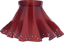

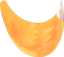

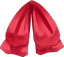

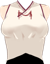

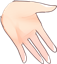

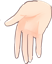

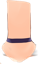

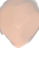

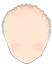

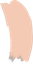

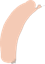

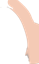

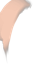

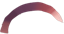

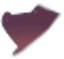

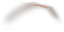

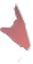

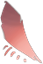

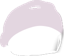

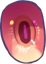

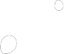

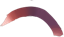

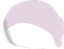

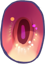

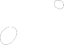

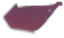

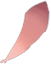

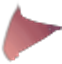

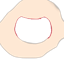

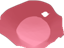

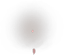

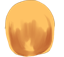

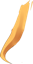

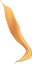

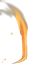

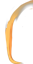

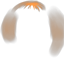

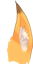

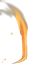

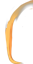

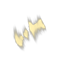

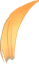

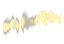

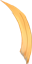

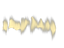

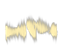

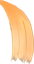

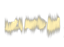

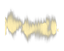

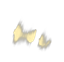

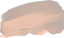

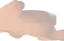

In [7]:
for tex in puppet.textures:
    if tex.width > tex.height:
        display(tex.resize((64, int(64 / tex.width * tex.height))))
    else:
        display(tex.resize((int(64 / tex.height * tex.width), 64)))

In [8]:
JSON({name: json.loads(payload.decode('utf-8')) for name, payload in puppet.exts.items()})

<IPython.core.display.JSON object>

In [9]:
JSON(puppet.root)

<IPython.core.display.JSON object>

In [10]:
puppet.nodes(name="Hand")

[Node(name='Hand:: Left', uuid='e4b0b14c'),
 Node(name='Hand:: Left:: Sleeve:: Phys', uuid='177645e5'),
 Node(name='Hand:: Right', uuid='42ede597'),
 Node(name='Hand:: Right:: Sleeve:: Phys', uuid='9e50321e')]

In [2]:
import inochi2d.api as api
import inochi2d.inochi2d as inochi2d
import platform as pf

from sdl2 import *
from OpenGL import GL, GLU
import ctypes

WINDOW_WIDTH = 600
WINDOW_HEIGHT = 900

if SDL_Init(SDL_INIT_VIDEO) != 0:
    print(SDL_GetError())
    exit(-1)

# Set up OpenGL context
SDL_GL_SetAttribute(SDL_GL_CONTEXT_PROFILE_MASK, SDL_GL_CONTEXT_PROFILE_CORE);
SDL_GL_SetAttribute(SDL_GL_CONTEXT_MAJOR_VERSION, 3);
SDL_GL_SetAttribute(SDL_GL_CONTEXT_MINOR_VERSION, 2);

# Set up buffers + alpha channel
SDL_GL_SetAttribute(SDL_GL_DOUBLEBUFFER, 1);
SDL_GL_SetAttribute(SDL_GL_DEPTH_SIZE, 24);
SDL_GL_SetAttribute(SDL_GL_STENCIL_SIZE, 8);
SDL_GL_SetAttribute(SDL_GL_ALPHA_SIZE, 8);

if pf.uname()[0] == "Linux":
    # Don't disable compositing on Linux
    SDL_SetHint(SDL_HINT_VIDEO_X11_NET_WM_BYPASS_COMPOSITOR, b"0")

    # We *always* want to use EGL, especially if we want to pass textures around via DMABUF.
    #SDL_SetHint(SDL_HINT_VIDEO_X11_FORCE_EGL, b"1")
    SDL_SetHint(SDL_HINT_VIDEO_EGL_ALLOW_TRANSPARENCY, b"1")

window = SDL_CreateWindow(
    b"Triangle",
    SDL_WINDOWPOS_UNDEFINED,
    SDL_WINDOWPOS_UNDEFINED, WINDOW_WIDTH, WINDOW_HEIGHT,
    SDL_WINDOW_OPENGL | SDL_WINDOW_RESIZABLE
)
if not window:
    print(SDL_GetError())
    exit(-1)

ctx = SDL_GL_CreateContext(window)
SDL_GL_MakeCurrent(window, ctx);
SDL_GL_SetSwapInterval(1); # Enable VSync

In [3]:
@ctypes.CFUNCTYPE(ctypes.c_double)
def curr_time():
    return SDL_GetTicks() * 0.001

inochi2d.init(curr_time)

In [4]:
puppet = inochi2d.Puppet.load("./Aka-working.inx")

In [5]:
inochi2d.Viewport.set(WINDOW_WIDTH, WINDOW_HEIGHT)
print("viewport=%f,%f"%inochi2d.Viewport.get())
camera = inochi2d.Camera.get_current()
camera.set_zoom(0.3)
print("zoom=%f"%camera.get_zoom())
camera.set_position(0., 0.)
print("position=%f,%f"%camera.get_position())

viewport=600.000000,900.000000
zoom=0.300000
position=0.000000,0.000000


In [6]:

ev = SDL_Event()
isrunning = True
while isrunning:
    while SDL_PollEvent(ctypes.byref(ev)) != 0:
        if ev.type == SDL_QUIT:
            isrunning = not isrunning

    try:
        GL.glClearColor(0, 0, 0, 1)
        GL.glClear(GL.GL_COLOR_BUFFER_BIT)
    except GL.GLError as e:
        pass

    with inochi2d.Scene(0, 0, WINDOW_WIDTH, WINDOW_HEIGHT) as scene:
        puppet.update()
        puppet.draw()

    SDL_GL_SwapWindow(window)
    SDL_Delay(10)

inochi2d.cleanup()

SDL_GL_DeleteContext(ctx)
SDL_DestroyWindow(window)
SDL_Quit()